# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

# Import Dataset

In [3]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.chdir("gdrive/MyDrive/quant_invest/")

Mounted at /content/gdrive


In [4]:
# Creating list of the year and dates we plan to include
YYYY_MM = ['2014-01', '2015-01' , '2016-01', '2017-01', '2018-01', '2019-01', '2020-01', '2021-01', '2022-01'] 
factor_scores = pd.read_csv('Portfolio_Ratings_New.csv') # Import .csv

In [5]:
factor_scores.head()

,Date,EXCHANGE_TICKER,Price12Mom,Value_EY,Beta,Mom_Val,Val_Beta,Mom_Bet,Mom_Val_Quad,Val_Beta_Quad,Mom_Bet_Quad,Mom_Val_Log,Val_Beta_Log,Mom_Bet_Log
0,31/01/2014,SBUX,2.610566,-0.003794,-1.111369,1.303386,-0.557582,0.749598,5.508603,3.130171,5.261234,2.969554,1.960947,2.630775
1,31/01/2014,WFM,1.210209,0.042937,-1.087502,0.626573,-0.522283,0.061353,4.334524,3.181851,3.997401,2.587439,1.987617,2.286298
2,31/01/2014,WBA,2.585360,0.070482,-0.939167,1.327921,-0.434342,0.823097,5.520337,3.294603,5.302243,3.000897,2.062786,2.726284
3,31/01/2014,HAL,2.001988,0.061307,-1.230365,1.031647,-0.584529,0.385811,5.006735,3.113182,4.651742,2.835252,1.927734,2.414647
4,31/01/2014,HBAN,2.749435,0.120163,-1.421205,1.434799,-0.650521,0.664115,5.688765,3.059060,5.290500,3.069673,1.852718,2.463464


In [6]:
import datetime

factor_scores['YYYY'] = pd.to_datetime(factor_scores['Date']).dt.year
factor_scores['Date'] = pd.to_datetime(factor_scores['Date'])
factor_scores['MM_YYYY'] = factor_scores['Date'].dt.to_period('M')
factor_scores.head()

<ipython-input-6-cc1b69eb9fba>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  factor_scores['YYYY'] = pd.to_datetime(factor_scores['Date']).dt.year
<ipython-input-6-cc1b69eb9fba>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  factor_scores['Date'] = pd.to_datetime(factor_scores['Date'])


,Date,EXCHANGE_TICKER,Price12Mom,Value_EY,Beta,Mom_Val,Val_Beta,Mom_Bet,Mom_Val_Quad,Val_Beta_Quad,Mom_Bet_Quad,Mom_Val_Log,Val_Beta_Log,Mom_Bet_Log,YYYY,MM_YYYY
0,2014-01-31,SBUX,2.610566,-0.003794,-1.111369,1.303386,-0.557582,0.749598,5.508603,3.130171,5.261234,2.969554,1.960947,2.630775,2014,2014-01
1,2014-01-31,WFM,1.210209,0.042937,-1.087502,0.626573,-0.522283,0.061353,4.334524,3.181851,3.997401,2.587439,1.987617,2.286298,2014,2014-01
2,2014-01-31,WBA,2.585360,0.070482,-0.939167,1.327921,-0.434342,0.823097,5.520337,3.294603,5.302243,3.000897,2.062786,2.726284,2014,2014-01
3,2014-01-31,HAL,2.001988,0.061307,-1.230365,1.031647,-0.584529,0.385811,5.006735,3.113182,4.651742,2.835252,1.927734,2.414647,2014,2014-01
4,2014-01-31,HBAN,2.749435,0.120163,-1.421205,1.434799,-0.650521,0.664115,5.688765,3.059060,5.290500,3.069673,1.852718,2.463464,2014,2014-01


In [7]:
import yfinance as yf
import pandas as pd

def get_stock_data(ticker, start_date, end_date):

    ticker_df = yf.download(ticker,start_date,end_date)
    return ticker_df['Adj Close']


In [8]:
# defining the list of all the unique stocks in the dataset
STOCKS = (pd.DataFrame(set(factor_scores['EXCHANGE_TICKER']))).dropna()

In [9]:
factor_scores = factor_scores[factor_scores['EXCHANGE_TICKER'].notna()]

In [10]:
returns = pd.DataFrame()

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2022, 12, 31)

# Extracting return data for the entire period for all stocks
# This can glitch sometimes since Yahoo limits how much information we can call sometimes so reset workspace
for ticker in STOCKS[0]:
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LO: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WINMQ: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FRX: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****************

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CELG: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MON: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRCM: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETFC: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MXIM: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GMCR: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VIAB: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DTV: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NLSN: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RDC: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- APC: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- STJ: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SPLS: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FLIR: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SNDK: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NBL: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DOFSQ: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VAR: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LLTC: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALXN: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HCBK: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()



[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WFM: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KRFT: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MJN: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MWV: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PBCT: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()



[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RTN: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CAM: No data found for this date range, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CERN: No timezone found, symbol may be delisted


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()
<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-b2f118ec6179>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = get_stock_data(ticker, start,end).pct_change()


In [11]:
# We should have 445 Columns

# Currently, the index is the 'date' therefore we will reset the index and add 'Date' to be a column
returns = returns.reset_index(inplace=False)
returns.head()

,Date,RTX,HUM,ALL,PFG,LO,WINMQ,ENPH,FRX,CA,...,TXN,FOXA,CHTR,OKE,VRSN,AFL,CERN,SCHW,CDW,R
0,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,0.003644,-0.010502,-0.004108,0.006993,NaN,NaN,0.020649,NaN,-0.001207,...,0.004408,NaN,-0.010315,0.002288,-0.002999,0.002881,NaN,0.003098,-0.000428,0.002065
2,2014-01-06,-0.000974,-0.009827,-0.003938,0.001021,NaN,NaN,0.017341,NaN,-0.005436,...,-0.008316,NaN,0.012222,0.007828,-0.006350,-0.019199,NaN,-0.003475,0.016260,-0.016348
3,2014-01-07,0.006383,-0.002084,0.004330,0.000612,NaN,NaN,0.071023,NaN,0.015791,...,-0.005358,NaN,0.022815,0.011003,0.028254,0.003237,NaN,-0.010461,0.009684,0.010195
4,2014-01-08,0.001233,-0.011437,0.003187,0.001835,NaN,NaN,-0.038462,NaN,0.004185,...,0.013818,NaN,-0.014412,0.009283,0.001636,-0.007067,NaN,0.011746,0.000000,0.003457


# Momentum and Value

In [12]:
# This chunk is for Momentum and Value
Mom_Val_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Mom_Val_returns = [Mom_Val_returns, portfolio_returns]
  Mom_Val_returns = pd.concat(Mom_Val_returns)



<ipython-input-12-0d39039ee8ce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val'], 10, labels = False)
<ipython-input-12-0d39039ee8ce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val'], 10, labels = False)
<ipython-input-12-0d39039ee8ce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Text(0.5, 1.0, 'Momentum Value strategy')

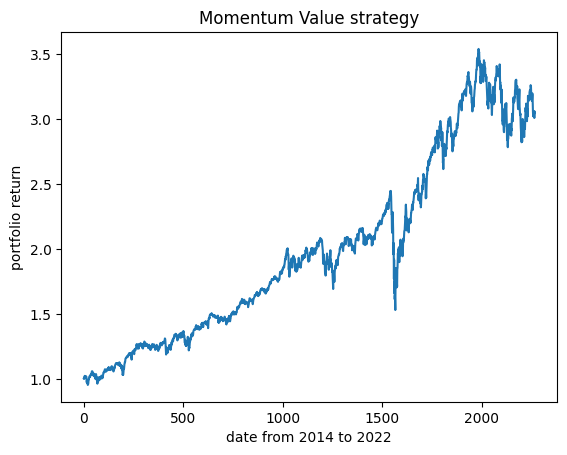

In [13]:
Mom_Val_returns = (Mom_Val_returns+1).cumprod()

import matplotlib.pyplot as plt

x_axis = range(2266)
y_axis = Mom_Val_returns

plt.plot(x_axis,y_axis)
plt.xlabel("date from 2014 to 2022")
plt.ylabel("portfolio return")
plt.title("Momentum Value strategy")

# Momentum and Low Beta

In [14]:
# This chunk is for Momentum and Value
Mom_Beta_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Mom_Beta_returns = [Mom_Beta_returns, portfolio_returns]
  Mom_Beta_returns = pd.concat(Mom_Beta_returns)



<ipython-input-14-4d66139db99b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet'], 10, labels = False)
<ipython-input-14-4d66139db99b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet'], 10, labels = False)
<ipython-input-14-4d66139db99b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

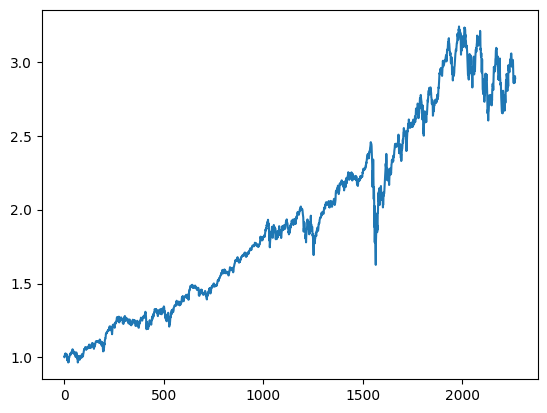

In [ ]:
Mom_Beta_returns = (Mom_Beta_returns+1).cumprod()

x_axis = range(2266)
y_axis = Mom_Beta_returns

plt.plot(x_axis,y_axis)

# Value and Low Beta

In [15]:
# This chunk is for Momentum and Value
Val_Beta_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Val_Beta_returns = [Val_Beta_returns, portfolio_returns]
  Val_Beta_returns = pd.concat(Val_Beta_returns)



<ipython-input-15-1160913e096a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta'], 10, labels = False)
<ipython-input-15-1160913e096a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta'], 10, labels = False)
<ipython-input-15-1160913e096a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

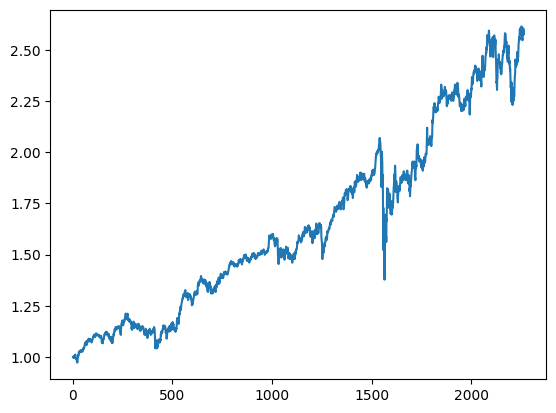

In [16]:
Val_Beta_returns = (Val_Beta_returns+1).cumprod()

x_axis = range(2266)
y_axis =Val_Beta_returns

plt.plot(x_axis,y_axis)


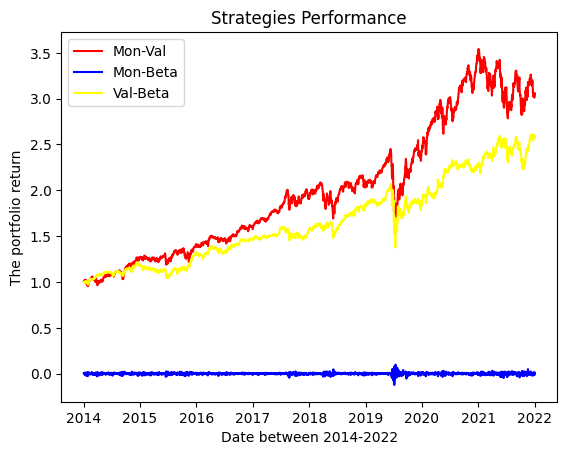

In [17]:
fig, ax = plt.subplots()
x_axis = np.linspace(2014, 2022, 2266)
y_axis =Mom_Val_returns

x_axis2 = np.linspace(2014, 2022, 2266)
y_axis2 =Mom_Beta_returns

x_axis3 = np.linspace(2014, 2022, 2266)
y_axis3 =Val_Beta_returns

ax.plot(x_axis, y_axis, color='red', label='Mon-Val')
ax.plot(x_axis2, y_axis2, color='blue', label='Mon-Beta')
ax.plot(x_axis3, y_axis3, color='yellow', label='Val-Beta')

ax.legend()
ax.legend()
ax.legend()
ax.set_xlabel('Date between 2014-2022')
ax.set_ylabel('The portfolio return')
ax.set_title('Strategies Performance')

plt.show()

# SINGLE FACTOR PORTFOLIOS : Momentum

In [18]:
Mom_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Price12Mom'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  #portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Mom_returns  = [Mom_returns , portfolio_returns]
  Mom_returns  = pd.concat(Mom_returns )

<ipython-input-18-8a519b812e4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Price12Mom'], 10, labels = False)
<ipython-input-18-8a519b812e4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Price12Mom'], 10, labels = False)
<ipython-input-18-8a519b812e4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

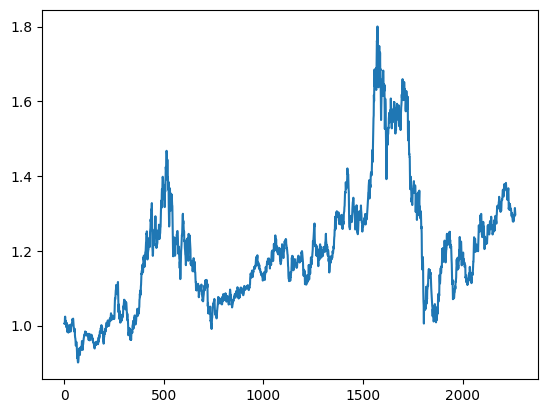

In [ ]:
Mom_returns = (Mom_returns+1).cumprod()

x_axis = range(2266)
y_axis =Mom_returns

plt.plot(x_axis,y_axis)


# Value

In [20]:
Val_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Value_EY'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  #portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Val_returns  = [Val_returns , portfolio_returns]
  Val_returns  = pd.concat(Val_returns )

<ipython-input-20-684f9210498b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Value_EY'], 10, labels = False)
<ipython-input-20-684f9210498b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Value_EY'], 10, labels = False)
<ipython-input-20-684f9210498b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

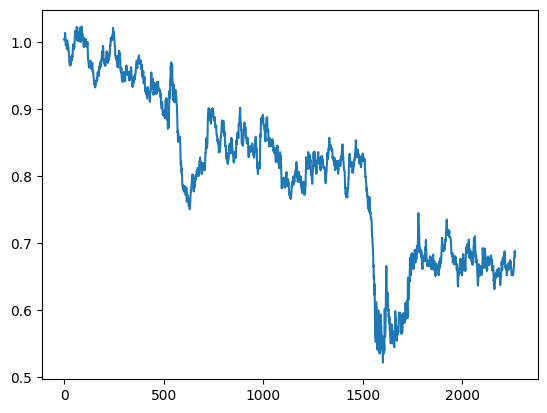

In [21]:
Val_returns = (Val_returns+1).cumprod()

x_axis = range(2266)
y_axis =Val_returns

plt.plot(x_axis,y_axis)

# Low Beta

In [22]:
Beta_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Beta'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  #portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Beta_returns  = [Beta_returns, portfolio_returns]
  Beta_returns  = pd.concat(Beta_returns )

<ipython-input-22-d24f928df08e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Beta'], 10, labels = False)
<ipython-input-22-d24f928df08e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Beta'], 10, labels = False)
<ipython-input-22-d24f928df08e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

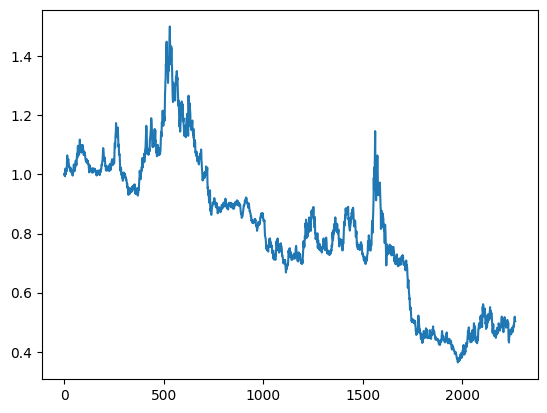

In [23]:
Beta_returns = (Beta_returns+1).cumprod()

x_axis = range(2266)
y_axis =Beta_returns

plt.plot(x_axis,y_axis)

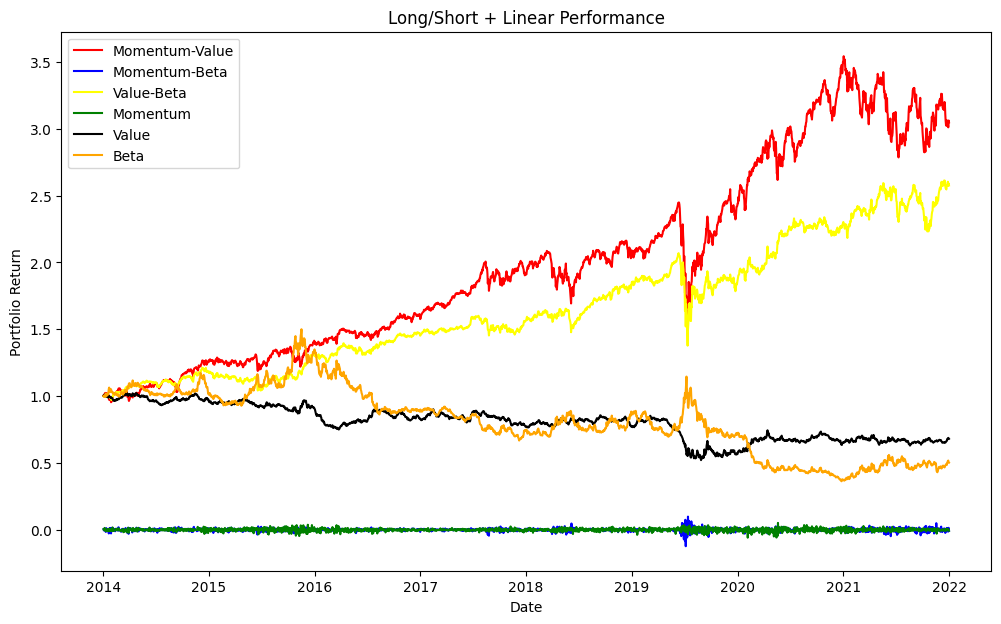

In [24]:
fig, ax = plt.subplots(figsize=(12,7))

x_axis = np.linspace(2014, 2022, 2266)
y_axis =Mom_Val_returns

x_axis2 = np.linspace(2014, 2022, 2266)
y_axis2 =Mom_Beta_returns

x_axis3 = np.linspace(2014, 2022, 2266)
y_axis3 =Val_Beta_returns

x_axis4 = np.linspace(2014, 2022, 2266)
y_axis4 =Mom_returns

x_axis5 = np.linspace(2014, 2022, 2266)
y_axis5 =Val_returns

x_axis6 = np.linspace(2014, 2022, 2266)
y_axis6 =Beta_returns

ax.plot(x_axis, y_axis, color='red', label='Momentum-Value')
ax.plot(x_axis2, y_axis2, color='blue', label='Momentum-Beta')
ax.plot(x_axis3, y_axis3, color='yellow', label='Value-Beta')
ax.plot(x_axis4, y_axis4, color='green', label='Momentum')
ax.plot(x_axis5, y_axis5, color='black', label='Value')
ax.plot(x_axis6, y_axis6, color='orange', label='Beta')

ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Return')
ax.set_title('Long/Short + Linear Performance')

plt.show()

# Log



In [25]:
# This chunk is for Momentum and Value
Mom_Val_Log_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val_Log'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Mom_Val_Log_returns = [Mom_Val_Log_returns, portfolio_returns]
  Mom_Val_Log_returns = pd.concat(Mom_Val_Log_returns)


<ipython-input-25-c29bd568874b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val_Log'], 10, labels = False)
<ipython-input-25-c29bd568874b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val_Log'], 10, labels = False)
<ipython-input-25-c29bd568874b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [26]:
# This chunk is for Momentum and Value
Mom_Beta_Log_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet_Log'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Mom_Beta_Log_returns = [Mom_Beta_Log_returns, portfolio_returns]
  Mom_Beta_Log_returns = pd.concat(Mom_Beta_Log_returns)

<ipython-input-26-a5d8d16ad80d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet_Log'], 10, labels = False)
<ipython-input-26-a5d8d16ad80d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet_Log'], 10, labels = False)
<ipython-input-26-a5d8d16ad80d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [27]:
# This chunk is for Momentum and Value
Val_Beta_Log_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta_Log'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Val_Beta_Log_returns = [Val_Beta_Log_returns, portfolio_returns]
  Val_Beta_Log_returns = pd.concat(Val_Beta_Log_returns)

<ipython-input-27-9caf86612082>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta_Log'], 10, labels = False)
<ipython-input-27-9caf86612082>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta_Log'], 10, labels = False)
<ipython-input-27-9caf86612082>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [28]:
Mom_Beta_Log_returns = (Mom_Beta_Log_returns+1).cumprod()

Mom_Val_Log_returns = (Mom_Val_Log_returns+1).cumprod()

Val_Beta_Log_returns = (Val_Beta_Log_returns+1).cumprod()

In [29]:
# This chunk is for Momentum and Value
Mom_Val_Quad_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val_Quad'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Mom_Val_Quad_returns = [Mom_Val_Quad_returns, portfolio_returns]
  Mom_Val_Quad_returns = pd.concat(Mom_Val_Quad_returns)

<ipython-input-29-864184d48fdf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val_Quad'], 10, labels = False)
<ipython-input-29-864184d48fdf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Val_Quad'], 10, labels = False)
<ipython-input-29-864184d48fdf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [30]:
# This chunk is for Momentum and Value
Mom_Beta_Quad_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet_Quad'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Mom_Beta_Quad_returns = [Mom_Beta_Quad_returns, portfolio_returns]
  Mom_Beta_Quad_returns = pd.concat(Mom_Beta_Quad_returns)

<ipython-input-30-8407549dfc69>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet_Quad'], 10, labels = False)
<ipython-input-30-8407549dfc69>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Mom_Bet_Quad'], 10, labels = False)
<ipython-input-30-8407549dfc69>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [31]:
# This chunk is for Momentum and Value
Val_Beta_Quad_returns = pd.DataFrame()

for month_year in YYYY_MM:

  # Extracting only data associated to those month and dates
  Data = factor_scores.loc[factor_scores['MM_YYYY'] == month_year,:] 

  # Calculate Decile Groups
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta_Quad'], 10, labels = False)

  # Select TICKERS of TOP and BOTTOM decile of stocks based on score
  top_decile =  Data.loc[Data['Quantile_rank'] == 9,'EXCHANGE_TICKER']
  bottom_decile =  Data.loc[Data['Quantile_rank'] == 0,'EXCHANGE_TICKER']
  
  # Creating Empty DataFrame
  top_returns = pd.DataFrame()
  bottom_returns = pd.DataFrame()

  # Extracts the year from the 'Date'
  year = (Data.reset_index(drop=True).loc[0,'Date']).year

  # Defining the first and last day of the year
  start = datetime.datetime(year, 1, 1)
  end = datetime.datetime(year, 12, 31)

  # Extract Returns for the tickers
  for ticker in top_decile:
    top_returns[ticker] = returns.loc[((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  for ticker in bottom_decile:
    bottom_returns[ticker] = returns.loc[ ((returns['Date'] >= start) & (returns['Date'] <= end)), ticker]

  # Taking the row sum for each returns


  #portfolio_returns = top_returns.mean(axis=1) - bottom_returns.mean(axis=1) # Allowing shorting
  portfolio_returns = top_returns.mean(axis=1)  # LONG ONLY

  # Mergining poortfolio returns with previous years
  Val_Beta_Quad_returns = [Val_Beta_Quad_returns, portfolio_returns]
  Val_Beta_Quad_returns = pd.concat(Val_Beta_Quad_returns)

<ipython-input-31-fa9b6e33b337>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta_Quad'], 10, labels = False)
<ipython-input-31-fa9b6e33b337>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Quantile_rank'] = pd.qcut(Data['Val_Beta_Quad'], 10, labels = False)
<ipython-input-31-fa9b6e33b337>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [32]:
Mom_Beta_Quad_returns = (Mom_Beta_Quad_returns+1).cumprod()

Mom_Val_Quad_returns = (Mom_Val_Quad_returns+1).cumprod()

Val_Beta_Quad_returns = (Val_Beta_Quad_returns+1).cumprod()

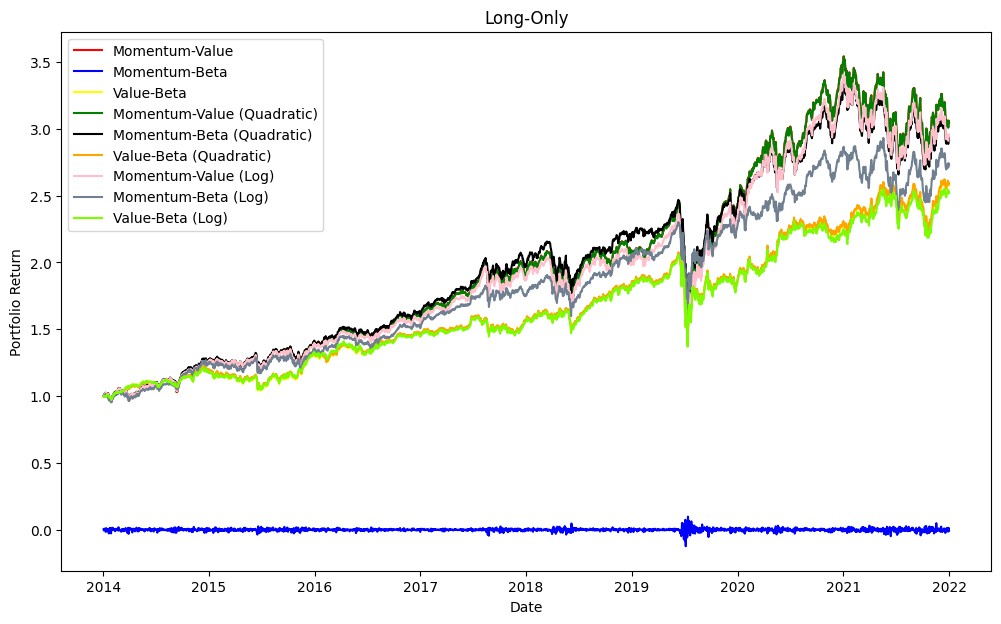

In [33]:
fig, ax = plt.subplots(figsize=(12,7))

x_axis = np.linspace(2014, 2022, 2266)
y_axis =Mom_Val_returns

x_axis2 = np.linspace(2014, 2022, 2266)
y_axis2 =Mom_Beta_returns

x_axis3 = np.linspace(2014, 2022, 2266)
y_axis3 = Val_Beta_returns

x_axis4 = np.linspace(2014, 2022, 2266)
y_axis4 = Mom_Val_Quad_returns

x_axis5 = np.linspace(2014, 2022, 2266)
y_axis5 =Mom_Beta_Quad_returns

x_axis6 = np.linspace(2014, 2022, 2266)
y_axis6 =Val_Beta_Quad_returns

x_axis7 = np.linspace(2014, 2022, 2266)
y_axis7 = Mom_Val_Log_returns

x_axis8 = np.linspace(2014, 2022, 2266)
y_axis8 =Mom_Beta_Log_returns

x_axis9 = np.linspace(2014, 2022, 2266)
y_axis9 =Val_Beta_Log_returns

ax.plot(x_axis, y_axis, color='red', label='Momentum-Value')
ax.plot(x_axis2, y_axis2, color='blue', label='Momentum-Beta')
ax.plot(x_axis3, y_axis3, color='yellow', label='Value-Beta')
ax.plot(x_axis4, y_axis4, color='green', label='Momentum-Value (Quadratic)')
ax.plot(x_axis5, y_axis5, color='black', label='Momentum-Beta (Quadratic)')
ax.plot(x_axis6, y_axis6, color='orange', label='Value-Beta (Quadratic)')
ax.plot(x_axis7, y_axis7, color='pink', label='Momentum-Value (Log)')
ax.plot(x_axis8, y_axis8, color='slategrey', label='Momentum-Beta (Log)')
ax.plot(x_axis9, y_axis9, color='lawngreen', label='Value-Beta (Log)')

ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Return')
ax.set_title('Long-Only')

plt.show()